In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

for dirname, _, filenames in os.walk("./"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./Project_1.ipynb
./.ipynb_checkpoints/Project_1-checkpoint.ipynb
./data/titanicCopy.csv
./data/titanic.csv
./data/.ipynb_checkpoints/titanic-checkpoint.csv
./data/.ipynb_checkpoints/titanicCopy-checkpoint.csv


# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

In [90]:
#Find which factors contribute to a higher survivability chance in the Titanic

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

In [91]:
#I recieved the data from the csv file and iterated through the data using a for loop 
data = pd.read_csv("data/titanicCopy.csv")
data.head()
#Then used pandas to recieve it

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

Men survival rate 18.890814558058924 %
Women survival rate 74.20382165605095 %
Young survival rate 50.35971223021583 %
Adult survival rate 38.26086956521739 %
Upper Class survival rate 68.125 %
Lower CLass survival rate 28.725314183123878 %


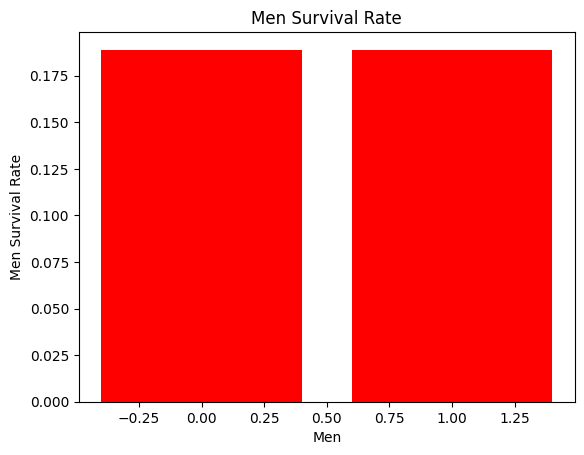

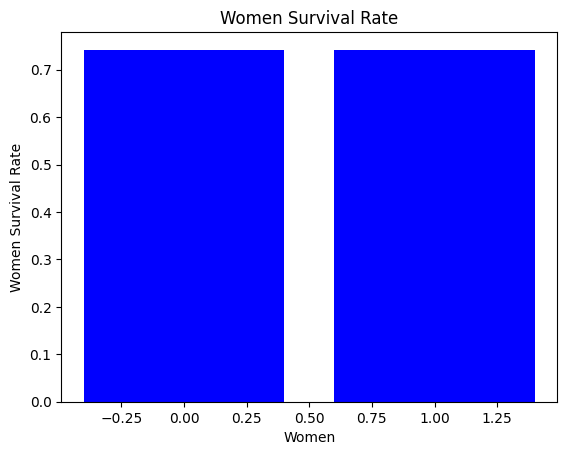

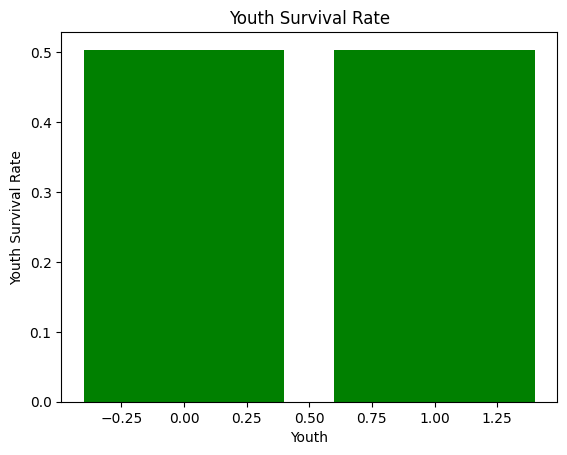

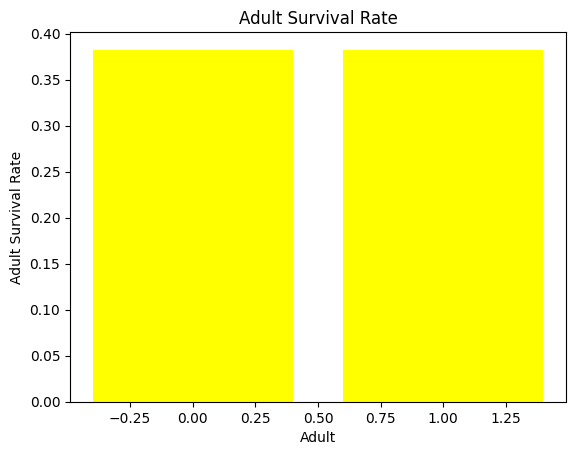

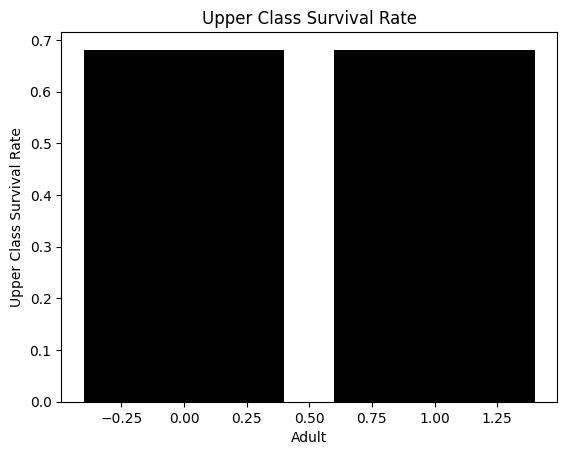

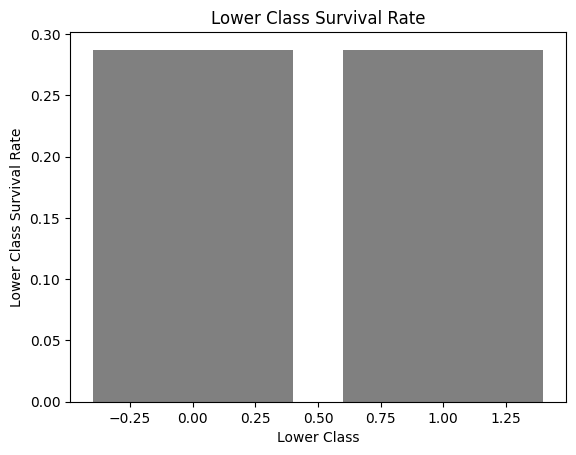

In [92]:
#Checking and graphing each category to find biases

men = data.loc[data.Sex == 'male']["Survived"]
menSurvivalRate = sum(men)/len(men)
print("Men survival rate", menSurvivalRate*100,"%")

women = data.loc[data.Sex == 'female']["Survived"]
womenSurvivalRate = sum(women)/len(women)
print("Women survival rate", womenSurvivalRate*100,"%")



youngAge = data.loc[data.Age <= 18]["Survived"]
youngSurvivalRate = sum(youngAge)/len(youngAge)
print("Young survival rate", youngSurvivalRate*100,"%")

older = data.loc[data.Age > 18]["Survived"]
olderSurvivalRate = sum(oldAge)/len(oldAge)
print("Adult survival rate", olderSurvivalRate*100,"%")

upperClass = data.loc[data.Fare > 50]["Survived"]
upperClassSurvivalRate = sum(upperClass)/len(upperClass)
print("Upper Class survival rate", upperClassSurvivalRate*100,"%")

lowerClass = data.loc[data.Fare < 25]["Survived"]
lowerClassSurvivalRate = sum(lowerClass)/len(lowerClass)
print("Lower CLass survival rate", lowerClassSurvivalRate*100,"%")

#Graphing the data to find biases
plt.bar(men, menSurvivalRate, color='red')
plt.title('Men Survival Rate')
plt.xlabel('Men')
plt.ylabel('Men Survival Rate')
plt.show()

plt.bar(women, womenSurvivalRate, color='blue')
plt.title('Women Survival Rate')
plt.xlabel('Women')
plt.ylabel('Women Survival Rate')
plt.show()

plt.bar(youngAge, youngSurvivalRate, color='green')
plt.title('Youth Survival Rate')
plt.xlabel('Youth')
plt.ylabel('Youth Survival Rate')
plt.show()

plt.bar(oldAge, olderSurvivalRate, color='yellow')
plt.title('Adult Survival Rate')
plt.xlabel('Adult')
plt.ylabel('Adult Survival Rate')
plt.show()

plt.bar(upperClass, upperClassSurvivalRate, color='black')
plt.title('Upper Class Survival Rate')
plt.xlabel('Adult')
plt.ylabel('Upper Class Survival Rate')
plt.show()

plt.bar(lowerClass, lowerClassSurvivalRate, color='gray')
plt.title('Lower Class Survival Rate')
plt.xlabel('Lower Class')
plt.ylabel('Lower Class Survival Rate')
plt.show()

#Data is biased towards upper class women and children  

# 4.Prepare the Data


Apply any data transformations and explain what and why


# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [ ]:
def infrence(prams):
    results = m.run(prams)
    return results 